In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [95]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [96]:
data = np.loadtxt('/content/drive/MyDrive/TSA_BDA_2024/Lab3/AlgeriaExport.txt')

Checking the Algerian Exports data

In [97]:
data

array([39.0431726 , 46.24455689, 19.79387268, 24.68468205, 25.08405873,
       22.60394356, 25.98619752, 23.43441677, 23.1356346 , 23.78877682,
       22.0727334 , 18.44251915, 20.44956198, 25.503663  , 38.74904361,
       33.68893622, 33.05458393, 30.58656693, 25.53583672, 31.14830021,
       34.33846147, 34.58725077, 30.92485632, 27.94180611, 25.71001618,
       23.58393289, 12.85475734, 14.27247473, 15.50786788, 18.63926334,
       23.44368508, 29.11782217, 25.31959428, 21.783877  , 22.53072525,
       26.19477598, 29.76044833, 30.90631138, 22.57835401, 28.1501165 ,
       42.06971832, 36.68930475, 35.50453311, 38.24882911, 40.0532265 ,
       47.20519324, 48.81068822, 47.06816355, 47.97334514, 35.37165064,
       38.44454785, 38.78695388, 36.89054757, 33.20989779, 30.21911743,
       23.17177829, 20.86001063, 22.63888685])

Plotting the Algerian export data to observe the time series

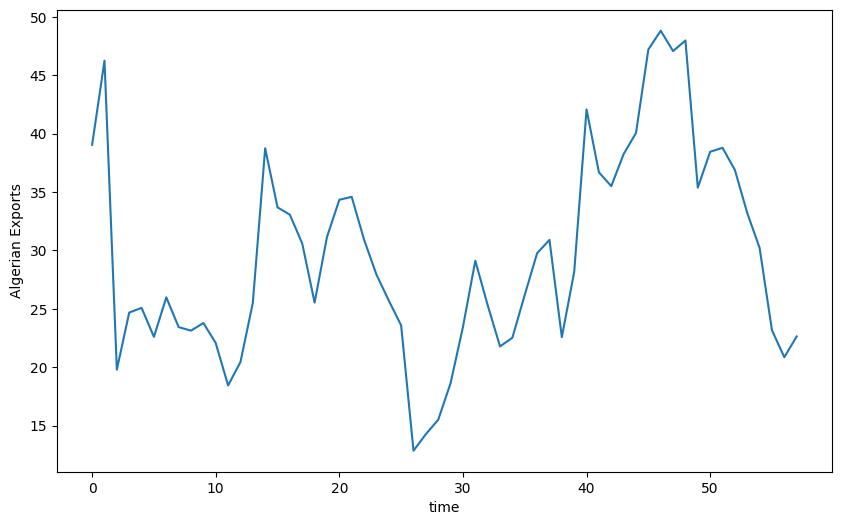

In [98]:
plt.figure(figsize=(10,6))
plt.plot(range(len(data) ), data )
plt.xlabel("time")
plt.ylabel("Algerian Exports")
plt.show()

Implementation of the simple exponential smoothing method -weighted avg form

In [100]:
def ses(Y, alpha, steps_ahead=0):
    l_o = Y[0]
    T = len(Y)
    Y_hat = [l_o]

    for t in range(1, T):
        y_hat_t_prev = Y_hat[-1]
        y_hat_t = alpha * Y[t-1] + (1 - alpha) * y_hat_t_prev
        Y_hat.append(y_hat_t)

    # for forecasting ahead
    if steps_ahead > 0:
        for s in range(steps_ahead):
            y_hat_t_prev = Y_hat[-1]
            y_hat_t = alpha * Y_hat[-1] + (1 - alpha) * y_hat_t_prev
            Y_hat.append(y_hat_t)

    return np.array(Y_hat)



calculation of sum of the squared residuals (SSE)

In [101]:
def calculate_sse(Y, Y_pred):
    return np.sum(np.square(Y - Y_pred))

In [102]:
alpha_values = np.arange(0,1, 0.01)


Implementing grid search to look for the best alpha corresponding to the smallest sse value

In [103]:
def run_grid_search(Y):
    smallest_sse = np.inf
    est_alpha = 1
    for alpha in alpha_values:
        y_pred = ses(Y, alpha)
        sse_value = calculate_sse(Y, y_pred)
        if sse_value < smallest_sse:
          smallest_sse = sse_value
          est_alpha = alpha
    return smallest_sse, est_alpha


In [104]:
smallest_sse , est_alpha = run_grid_search(data)

The smallest sse value :

In [105]:
smallest_sse

1995.536761002905

Estimated Alpha value:

In [106]:
est_alpha

0.84

Running ses to get estimates of Y using min_alpha

In [107]:
#  forecast 5 datapoints
forecast = 5
y_hat = ses(data, est_alpha, steps_ahead=forecast)


In [108]:
predicted = y_hat[-forecast:]
y_hat = y_hat[:-forecast]

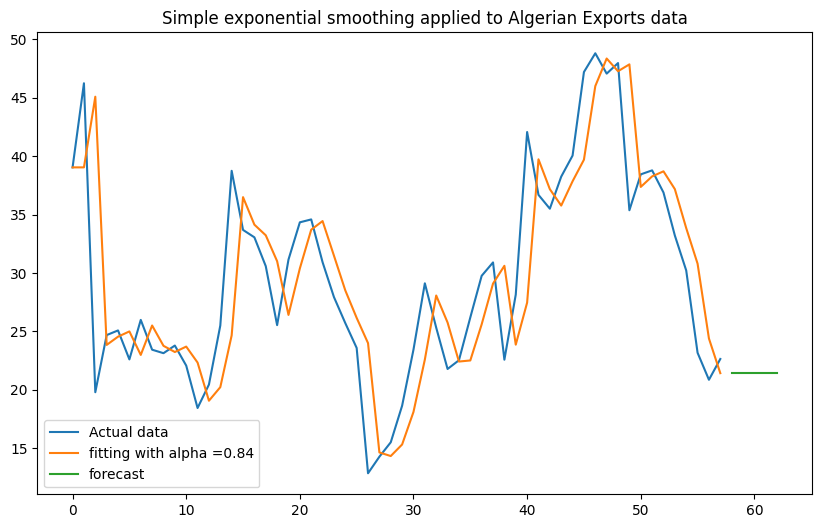

In [109]:
plt.figure(figsize=(10,6))
plt.plot(range(len(data) ), data , label="Actual data")
plt.plot(range(len(y_hat) ), y_hat , label=f"fitting with alpha ={est_alpha}")
plt.plot(range(len(y_hat), len(y_hat)+forecast ), predicted , label=f"forecast")
plt.legend()
plt.title("Simple exponential smoothing applied to Algerian Exports data")
plt.show()

Splitting data into training and testing sets , training set 80% ,testing set 20%

In [110]:
length = len(data)
test_size = 0.2
split_index = int(length * (1 - test_size))
X_train = data[:split_index+1]
X_test = data[split_index:]


In [111]:
smallest_sse , est_alpha = run_grid_search(X_train)
est_alpha

0.8

In [112]:
forecast=4

In [113]:
y_pred = ses(X_test, est_alpha, steps_ahead=forecast)

In [114]:
len(y_pred)

16

In [115]:
predicted = y_pred[-forecast:]
y_pred = y_pred[:-forecast]

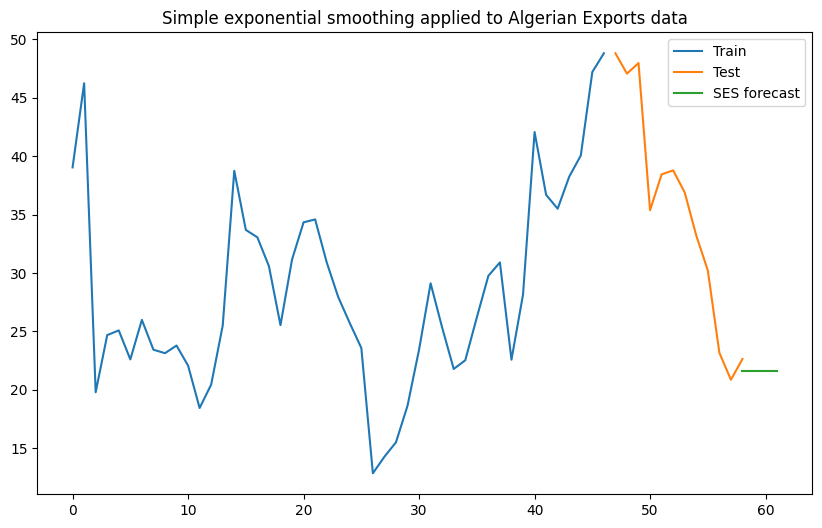

In [116]:
plt.figure(figsize=(10,6))
plt.plot( range(len(X_train)), X_train , label="Train")
plt.plot( range(len(X_train), len(X_train) + len(X_test)), X_test, label="Test")
plt.plot( range(len(data) ,  len(data) + forecast), predicted , label="SES forecast")
plt.legend()
plt.title("Simple exponential smoothing applied to Algerian Exports data")
plt.show()
